In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr


import warnings
warnings.filterwarnings('ignore')

## Load and Clean Data

In [ ]:
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head()

In [ ]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df_check = df[
    [
        "Savanna_fires",
        "Forest_fires",
        "Crop_Residues",
        "Forestland",
        "Net_Forest_conversion",
        "Food_Household_Consumption",
        "IPPU",
        "Manure_applied_to_Soils",
        "Manure_Management",
        "On-farm_energy_use",
    ]
]

### Handling missing data:
- Mean-It is preferred if data is numeric and not skewed.
- 
Median-It is preferred if data is numeric and skewed
- 
Mode-It is preferred if the data is a string(object) or numeric.

In [ ]:
df_check.hist(bins=10, figsize=(15, 10), edgecolor="black")

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill NaN values in numeric columns with the mean of each column
numeric_cols_filled = numeric_cols.fillna(numeric_cols.mean())

df_filled = pd.concat([non_numeric_cols, numeric_cols_filled], axis=1)

In [ ]:
df = df_filled.copy()
df.isna().sum()

## Exploratory Data Analysis

In [ ]:
df.describe().T

In [ ]:
df.head(10)

In [ ]:
df["Drained_organic_soils_(CO2)"].value_counts()

In [ ]:
df["Fires_in_organic_soils"].value_counts()

In [ ]:
df["Fires_in_humid_tropical_forests"].value_counts()

In [ ]:
df.hist(figsize=(20, 20))

In [ ]:
# The correlation heatmap
corr = df.drop("Area", axis="columns").corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
plot_corr(corr, xnames=corr.columns, ax=ax)

In [ ]:
def line_graph(df, x, y, title):
    """
    The function receives a dataframe as the first argument followed by the independet variable x and column Y and
    the title of the graph to be plotted, the fuction use these arguments to plot a line graph
    """

    # Time Series Analysis - Trend Analysis
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=df)
    plt.title(title)
    plt.show()


line_graph(
    df,
    "Year",
    "Average_Temperature_°C",
    "Trend of Average Temperature (°C) Over the Years",
)

The graph clearly shows a rise in average temperature from the 1990s to 2020.

In [ ]:
line_graph(df, "Year", "total_emission", "Trend of Total Emissions Over the Years")

The graph leaves no doubt that carbon dioxide emissions have steadily increased linearly over the years.

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75},
)
plt.title("Correlation Matrix with Color Scale and  correlation coefficient")
plt.show()

From the heat map, it is evident that there is a multilinear correlation between many variables, the squares appering in dark blue indicate a negative correlation whiile the squares appearing in dark red or meron indicate positive correlation. multilinear correlation is not good for a reggration model.  


let's explore the total emissions per year.

In [71]:
df.head(1)

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban_population,Total_Population_-_Male,Total_Population_-_Female,total_emission,Average_Temperature_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167


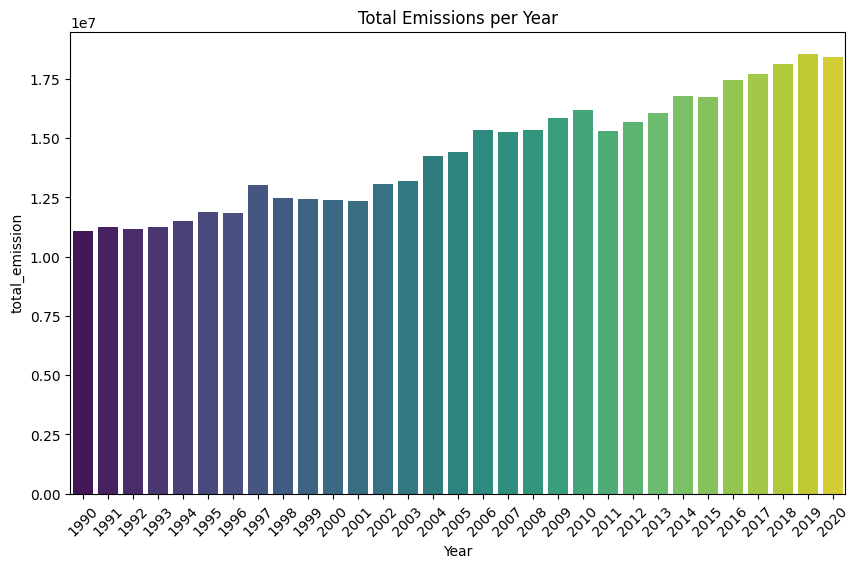

In [75]:
def bar_graph_plots(df, title, x, y):

    emissions_per_year = df.groupby(x)[y].sum().reset_index()

    # Plot the data using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=emissions_per_year, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title)


bar_graph_plots(df, "Total Emissions per Year", "Year", "total_emission")

In [ ]:
    # Customizing the plot
    plt.xlabel('Year')
    plt.ylabel('Total Emissions')
    plt.title('Total Emissions per Year')
    plt.xticks(emissions_per_year['Year'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

## Preprocessing